
# <center> Preparação e Classificação não supervisionada da grade celular </center>

<br/>

<div style="text-align: center;font-size: 90%;">
    Bruno Dias dos Santos<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Programa de Pós-Graduação em Computação Aplicada, Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brasil
    <br/><br/>
    Contato: <div><a href="mailto:bruno.santos@inpe.br">bruno.santos@inpe.br</a></div>
    <br/><br/>
    Última atualização: 18 de Abril de 2022
</div>
<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Resumo.</b>  Este Notebook apresenta uma metodologia para tratar variáveis e posterior classificação não supervisionada  algoritmos <i> K-Means, Agglomerative Clustering (AG) e Self-Organizing Maps (SOM) </i>. Dado uma tabela de arquivo shapefile (.shp) os atributos serão tratados a partir do preenchimento de valores faltantes e normalizados. Posteriormente, serão construidos modelos com os três algoritmos não supervisionados selecionados.
</div>    

<br/>

### 1º Etapa: Tratamento e seleção de variáveis

Importação das bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn_som.som import SOM

Leitura do shapefile e criação de um GeoDataFrame:

In [2]:
obj = gpd.read_file("E:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\AMBIENTAL\\base_ambiental.shp")

In [3]:
obj

,ID,SN [MEAN],VN [MEAN],HND [MEAN],CA_AG,CA_SE,CA_VA,CA_VH,PLAND_AG,PLAND_SE,...,SN [RANGE],SN [SUM],SN [VARIAN,VN [MIN],VN [MAX],VN [RANGE],VN [SUM],VN [VARIAN,AG_DIST,geometry
0,0,6.754481,0.009587,18.437500,0.000000,0.000000,0.821097,0.000000,0.0,0.00000,...,4.698410,81.053769,2.108832,0.002091,0.013346,0.011254,0.115039,1.271420e-05,NaN,"POLYGON ((752288.17666 9722818.28253, 752288.6..."
1,1,9.407907,0.007406,13.333333,0.000000,0.000000,0.816747,0.000000,0.0,0.00000,...,4.876045,112.894880,1.737626,-0.004193,0.015665,0.019858,0.088869,4.834090e-05,8017.44,"POLYGON ((752388.36020 9722817.84804, 752388.7..."
2,2,11.788490,-0.005065,6.166667,0.000000,0.000000,0.812398,0.000000,0.0,0.00000,...,6.011643,141.461881,2.762448,-0.018855,0.012644,0.031499,-0.060775,8.573330e-05,7941.41,"POLYGON ((752488.54379 9722817.41380, 752488.9..."
3,3,8.085612,-0.009939,4.000000,0.000000,0.000000,0.808053,0.000000,0.0,0.00000,...,4.440647,97.027342,1.904556,-0.018599,-0.003308,0.015291,-0.119270,2.605000e-05,7865.92,"POLYGON ((752588.72746 9722816.97981, 752589.1..."
4,4,6.270410,-0.019960,3.666667,0.000000,0.074585,0.546418,0.035806,0.0,7.45264,...,2.200427,56.433689,0.514981,-0.026471,-0.008160,0.018311,-0.179638,3.504870e-05,7790.98,"POLYGON ((752688.91118 9722816.54607, 752689.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,14650,2.569417,0.001021,1.750000,1.000779,0.000000,0.000000,0.000000,100.0,0.00000,...,0.884628,23.124752,0.080671,-0.003344,0.004045,0.007389,0.009189,5.189000e-06,NaN,"POLYGON ((752435.78613 9733807.56075, 752436.2..."
14651,14651,1.584903,-0.003223,NaN,1.000780,0.000000,0.000000,0.000000,100.0,0.00000,...,1.202439,14.264123,0.119417,-0.005285,-0.000597,0.004688,-0.029008,2.480400e-06,NaN,"POLYGON ((752535.94173 9733807.13343, 752536.3..."
14652,14652,0.966356,-0.002464,NaN,1.000781,0.000000,0.000000,0.000000,100.0,0.00000,...,0.874507,11.596267,0.060694,-0.004182,-0.001457,0.002725,-0.029567,6.251000e-07,NaN,"POLYGON ((752636.09739 9733806.70637, 752636.5..."
14653,14653,1.724494,-0.001503,1.125000,1.000782,0.000000,0.000000,0.000000,100.0,0.00000,...,0.929490,15.520449,0.083104,-0.001864,-0.000987,0.000877,-0.013528,6.030000e-08,NaN,"POLYGON ((752736.25311 9733806.27957, 752736.6..."


Definicação da variável identificadora de cada feição:

In [4]:
indice = 'ID'

Criando uma base de dados que será utilizada na saída, copiando as informações do 'indice' e o 'TARGET' da base original:

In [48]:
geom = obj[[indice,'geometry']]

In [6]:
geom

,ID,geometry
0,0,"POLYGON ((752288.17666 9722818.28253, 752288.6..."
1,1,"POLYGON ((752388.36020 9722817.84804, 752388.7..."
2,2,"POLYGON ((752488.54379 9722817.41380, 752488.9..."
3,3,"POLYGON ((752588.72746 9722816.97981, 752589.1..."
4,4,"POLYGON ((752688.91118 9722816.54607, 752689.3..."
...,...,...
14650,14650,"POLYGON ((752435.78613 9733807.56075, 752436.2..."
14651,14651,"POLYGON ((752535.94173 9733807.13343, 752536.3..."
14652,14652,"POLYGON ((752636.09739 9733806.70637, 752636.5..."
14653,14653,"POLYGON ((752736.25311 9733806.27957, 752736.6..."


Extraindo as variáveis para tratamento dos dados:

In [7]:
var_num = pd.DataFrame(obj.select_dtypes(include=['float64','int64','int','float']))

In [8]:
var_num

,ID,SN [MEAN],VN [MEAN],HND [MEAN],CA_AG,CA_SE,CA_VA,CA_VH,PLAND_AG,PLAND_SE,...,SN [MAX],SN [RANGE],SN [SUM],SN [VARIAN,VN [MIN],VN [MAX],VN [RANGE],VN [SUM],VN [VARIAN,AG_DIST
0,0,6.754481,0.009587,18.437500,0.000000,0.000000,0.821097,0.000000,0.0,0.00000,...,9.041828,4.698410,81.053769,2.108832,0.002091,0.013346,0.011254,0.115039,1.271420e-05,NaN
1,1,9.407907,0.007406,13.333333,0.000000,0.000000,0.816747,0.000000,0.0,0.00000,...,11.526811,4.876045,112.894880,1.737626,-0.004193,0.015665,0.019858,0.088869,4.834090e-05,8017.44
2,2,11.788490,-0.005065,6.166667,0.000000,0.000000,0.812398,0.000000,0.0,0.00000,...,13.678106,6.011643,141.461881,2.762448,-0.018855,0.012644,0.031499,-0.060775,8.573330e-05,7941.41
3,3,8.085612,-0.009939,4.000000,0.000000,0.000000,0.808053,0.000000,0.0,0.00000,...,10.997881,4.440647,97.027342,1.904556,-0.018599,-0.003308,0.015291,-0.119270,2.605000e-05,7865.92
4,4,6.270410,-0.019960,3.666667,0.000000,0.074585,0.546418,0.035806,0.0,7.45264,...,7.253409,2.200427,56.433689,0.514981,-0.026471,-0.008160,0.018311,-0.179638,3.504870e-05,7790.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,14650,2.569417,0.001021,1.750000,1.000779,0.000000,0.000000,0.000000,100.0,0.00000,...,2.939295,0.884628,23.124752,0.080671,-0.003344,0.004045,0.007389,0.009189,5.189000e-06,NaN
14651,14651,1.584903,-0.003223,NaN,1.000780,0.000000,0.000000,0.000000,100.0,0.00000,...,2.112215,1.202439,14.264123,0.119417,-0.005285,-0.000597,0.004688,-0.029008,2.480400e-06,NaN
14652,14652,0.966356,-0.002464,NaN,1.000781,0.000000,0.000000,0.000000,100.0,0.00000,...,1.486574,0.874507,11.596267,0.060694,-0.004182,-0.001457,0.002725,-0.029567,6.251000e-07,NaN
14653,14653,1.724494,-0.001503,1.125000,1.000782,0.000000,0.000000,0.000000,100.0,0.00000,...,2.154931,0.929490,15.520449,0.083104,-0.001864,-0.000987,0.000877,-0.013528,6.030000e-08,NaN


In [9]:
var_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14655 entries, 0 to 14654
Columns: 101 entries, ID to AG_DIST
dtypes: float64(96), int64(5)
memory usage: 11.3 MB


Normalizando e preenchendo possíveis valores vazios a partir de um valor dummy:

In [10]:
dummy = 0 

var_num.iloc[:,1:] = var_num.iloc[:,1:].fillna(dummy)

scaler = StandardScaler()
var_num.iloc[:,1:] = scaler.fit_transform(var_num.iloc[:,1:])
var_num

,ID,SN [MEAN],VN [MEAN],HND [MEAN],CA_AG,CA_SE,CA_VA,CA_VH,PLAND_AG,PLAND_SE,...,SN [MAX],SN [RANGE],SN [SUM],SN [VARIAN,VN [MIN],VN [MAX],VN [RANGE],VN [SUM],VN [VARIAN,AG_DIST
0,0,-0.073030,0.787566,0.205118,-0.403693,-0.309557,0.928459,-0.682653,-0.403692,-0.309555,...,-0.034024,0.146106,0.071024,-0.131205,0.759447,0.447215,-0.288115,0.876944,-0.266540,-1.175413
1,1,0.339348,0.632469,-0.077947,-0.403693,-0.309557,0.918417,-0.682653,-0.403692,-0.309555,...,0.280041,0.191154,0.524258,-0.173434,0.333727,0.595473,0.299952,0.701905,0.024313,2.437062
2,2,0.709323,-0.254420,-0.475393,-0.403693,-0.309557,0.908381,-0.682653,-0.403692,-0.309555,...,0.551933,0.479145,0.930887,-0.056848,-0.659534,0.402368,1.095681,-0.299014,0.329582,2.402804
3,3,0.133846,-0.601097,-0.595551,-0.403693,-0.309557,0.898350,-0.682653,-0.403692,-0.309555,...,0.213192,0.080736,0.298396,-0.154444,-0.642237,-0.617487,-0.012205,-0.690264,-0.157668,2.368790
4,4,-0.148261,-1.313754,-0.614037,-0.403693,0.368860,0.294439,-0.520657,-0.403692,0.368849,...,-0.260053,-0.487389,-0.279424,-0.312525,-1.175478,-0.927626,0.194231,-1.094039,-0.084203,2.335024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,14650,-0.723446,0.178388,-0.720330,2.703014,-0.309557,-0.966817,-0.682653,2.703107,-0.309555,...,-0.805293,-0.821079,-0.753551,-0.361933,0.391207,-0.147408,-0.552335,0.168954,-0.327975,-1.175413
14651,14651,-0.876452,-0.123452,-0.817381,2.703018,-0.309557,-0.966817,-0.682653,2.703107,-0.309555,...,-0.909824,-0.740481,-0.879675,-0.357525,0.259745,-0.444168,-0.736988,-0.086532,-0.350088,-1.175413
14652,14652,-0.972583,-0.069461,-0.817381,2.703022,-0.309557,-0.966817,-0.682653,2.703107,-0.309555,...,-0.988895,-0.823645,-0.917650,-0.364206,0.334462,-0.499142,-0.871155,-0.090274,-0.365234,-1.175413
14653,14653,-0.854758,-0.001129,-0.754991,2.703025,-0.309557,-0.966817,-0.682653,2.703107,-0.309555,...,-0.904425,-0.809702,-0.861792,-0.361656,0.491512,-0.469081,-0.997476,0.017005,-0.369845,-1.175413


Visualizando estatísticas descritivas da base de dados já tratada:

In [11]:
var_num.describe()

,ID,SN [MEAN],VN [MEAN],HND [MEAN],CA_AG,CA_SE,CA_VA,CA_VH,PLAND_AG,PLAND_SE,...,SN [MAX],SN [RANGE],SN [SUM],SN [VARIAN,VN [MIN],VN [MAX],VN [RANGE],VN [SUM],VN [VARIAN,AG_DIST
count,14655.000000,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,...,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04
mean,7327.000000,7.983227e-16,-4.920152e-17,-1.670297e-16,7.731183e-16,3.470752e-15,3.064770e-14,-4.143014e-16,-6.546490e-14,-2.350779e-15,...,-2.736429e-16,-1.142230e-15,-3.487714e-16,-3.340480e-16,6.122098e-16,-6.247703e-17,-4.348544e-16,-2.616657e-17,-1.465941e-16,-6.896368e-15
std,4230.678433,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,...,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,0.000000,-1.099172e+00,-7.525019e+00,-8.173811e-01,-4.036925e-01,-3.095570e-01,-9.668170e-01,-6.826527e-01,-4.036921e-01,-3.095549e-01,...,-1.145222e+00,-1.018520e+00,-1.063264e+00,-3.709537e-01,-7.939907e+00,-5.572107e+00,-1.028394e+00,-8.504414e+00,-3.701892e-01,-1.175413e+00
25%,3663.500000,-5.562842e-01,-4.012465e-01,-6.140366e-01,-4.036925e-01,-3.095570e-01,-9.668170e-01,-6.826527e-01,-4.036921e-01,-3.095549e-01,...,-5.710291e-01,-5.779074e-01,-5.548362e-01,-3.340489e-01,-3.620908e-01,-4.759820e-01,-6.059402e-01,-3.795004e-01,-3.356027e-01,-9.009864e-01
50%,7327.000000,-2.959409e-01,1.372852e-02,-3.182628e-01,-4.036925e-01,-3.095570e-01,-4.799820e-01,-4.810062e-01,-4.036921e-01,-3.095549e-01,...,-3.082999e-01,-3.100486e-01,-2.938365e-01,-2.779274e-01,1.690748e-01,-1.539745e-01,-3.075962e-01,1.808074e-02,-2.758216e-01,-1.868195e-01
75%,10990.500000,1.305065e-01,3.887945e-01,2.178271e-01,-4.036925e-01,-3.095570e-01,1.218936e+00,3.424732e-01,-4.036921e-01,-3.095549e-01,...,1.404692e-01,1.889926e-01,1.348322e-01,-1.042622e-01,5.237773e-01,2.827693e-01,2.239778e-01,3.791422e-01,-8.216661e-02,7.041898e-01
max,14654.000000,8.697107e+00,8.661754e+00,6.690189e+00,2.749942e+00,8.793529e+00,2.564411e+00,3.845565e+00,2.749929e+00,8.793315e+00,...,7.264192e+00,1.018578e+01,1.001596e+01,2.305669e+01,6.790690e+00,9.039809e+00,1.228958e+01,9.730551e+00,2.623168e+01,2.708863e+00


Definição do fator de correlação a ser considerado.

Dado duas variáveis [<i>i</i>,<i>j</i>], será calculado a correlação entre <i>i</i> e <i>j</i>. Caso a correlação entre as duas variáveis seja maior do que o <b>fator máximo de correlação</b>, faremos a exclusão daquela com menor poder explicativo a partir do seu R²:

In [12]:
fator = 0.70

Remoção de variáveis de alta correlação _(Pearson)_:

In [13]:
colunas = list(var_num.columns)
aux = list(var_num.columns)

for i in range(len(colunas)):
    for j in range(len(colunas)):
        if j > i and abs(var_num[colunas[i]].corr(var_num[colunas[j]])) > fator:
            if (colunas[j] in aux) and (colunas[j] != indice):
                aux.remove(colunas[j])

Quantidade de variáveis do Dataframe que será gerado para a saída:

In [14]:
len(aux)

31

Visualização das colunas que estarão no Dataframe de saída:

In [15]:
aux

['ID',
 'SN [MEAN]',
 'VN [MEAN]',
 'HND [MEAN]',
 'CA_AG',
 'CA_SE',
 'CA_VA',
 'CA_VH',
 'PD_AG',
 'PD_VA',
 'PD_VH',
 'MPS_VH',
 'PSSD_AG',
 'PSSD_VA',
 'MSI_SE',
 'MSI_VH',
 'MPFD_AG',
 'MPFD_SE',
 'MPFD_VA',
 'MPFD_VH',
 'AWMPFD_VA',
 'AWMPFD_VH',
 'MPAR_AG',
 'MPAR_SE',
 'MPAR_VA',
 'MPAR_VH',
 'IJI_VA',
 'TABO_SE',
 'TABO_VA',
 'TABO_VH',
 'PRD']

Dentre as variáveis que restaram após o processo de seleção, é realizado uma nova seleção manual de variáveis para que determinados fatores não pesem mais do que outros no processo de classificação não supervisionada:

In [34]:
aux = ['ID', 'SN [MEAN]', 'VN [MEAN]', 'HND [MEAN]', 'CA_AG', 'CA_SE', 'CA_VA', 'CA_VH', 'PD_VH']

Célula de conferência que mostra que as variáveis que sobraram não possuem uma correlação acima do <b>fator máximo de correlação</b> inserido - exceto para a variável de identificação:

In [35]:
corr_df = var_num[aux].corr()

corr_df.style.background_gradient(cmap='Spectral')

,ID,SN [MEAN],VN [MEAN],HND [MEAN],CA_AG,CA_SE,CA_VA,CA_VH,PD_VH
ID,1.000000,-0.340505,0.034786,-0.180874,0.453271,0.024549,-0.492201,-0.038541,-0.063536
SN [MEAN],-0.340505,1.000000,0.005706,0.553828,-0.120631,-0.016552,0.269215,-0.116472,-0.123260
VN [MEAN],0.034786,0.005706,1.000000,0.405202,-0.001836,0.002250,-0.014053,-0.002163,-0.017436
HND [MEAN],-0.180874,0.553828,0.405202,1.000000,-0.217731,0.016929,0.153361,-0.046799,-0.054152
CA_AG,0.453271,-0.120631,-0.001836,-0.217731,1.000000,-0.104321,-0.365373,-0.230252,-0.277571
CA_SE,0.024549,-0.016552,0.002250,0.016929,-0.104321,1.000000,-0.190727,0.022658,0.060622
CA_VA,-0.492201,0.269215,-0.014053,0.153361,-0.365373,-0.190727,1.000000,-0.343799,-0.298498
CA_VH,-0.038541,-0.116472,-0.002163,-0.046799,-0.230252,0.022658,-0.343799,1.000000,0.688742
PD_VH,-0.063536,-0.123260,-0.017436,-0.054152,-0.277571,0.060622,-0.298498,0.688742,1.000000


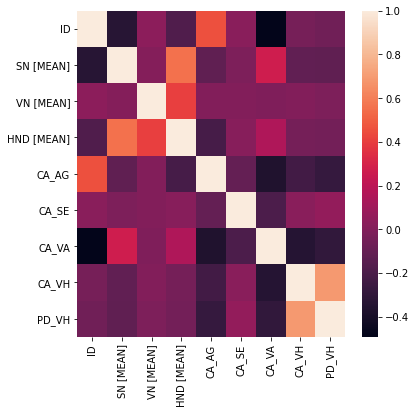

In [37]:
corr_df = var_num[aux].corr(method='pearson')

plt.figure(figsize=(6, 6))
sns.heatmap(corr_df, annot=False)
plt.show()

Salvando um shapefile com os dados tratados:

In [49]:
geom = geom.merge(var_num[aux], left_on='ID', right_on=indice)
geom

,ID,geometry,SN [MEAN],VN [MEAN],HND [MEAN],CA_AG,CA_SE,CA_VA,CA_VH,PD_VH
0,0,"POLYGON ((752288.17666 9722818.28253, 752288.6...",-0.073030,0.787566,0.205118,-0.403693,-0.309557,0.928459,-0.682653,-0.835323
1,1,"POLYGON ((752388.36020 9722817.84804, 752388.7...",0.339348,0.632469,-0.077947,-0.403693,-0.309557,0.918417,-0.682653,-0.835323
2,2,"POLYGON ((752488.54379 9722817.41380, 752488.9...",0.709323,-0.254420,-0.475393,-0.403693,-0.309557,0.908381,-0.682653,-0.835323
3,3,"POLYGON ((752588.72746 9722816.97981, 752589.1...",0.133846,-0.601097,-0.595551,-0.403693,-0.309557,0.898350,-0.682653,-0.835323
4,4,"POLYGON ((752688.91118 9722816.54607, 752689.3...",-0.148261,-1.313754,-0.614037,-0.403693,0.368860,0.294439,-0.520657,-0.114445
...,...,...,...,...,...,...,...,...,...,...
14650,14650,"POLYGON ((752435.78613 9733807.56075, 752436.2...",-0.723446,0.178388,-0.720330,2.703014,-0.309557,-0.966817,-0.682653,-0.835323
14651,14651,"POLYGON ((752535.94173 9733807.13343, 752536.3...",-0.876452,-0.123452,-0.817381,2.703018,-0.309557,-0.966817,-0.682653,-0.835323
14652,14652,"POLYGON ((752636.09739 9733806.70637, 752636.5...",-0.972583,-0.069461,-0.817381,2.703022,-0.309557,-0.966817,-0.682653,-0.835323
14653,14653,"POLYGON ((752736.25311 9733806.27957, 752736.6...",-0.854758,-0.001129,-0.754991,2.703025,-0.309557,-0.966817,-0.682653,-0.835323


Renomeando as colunas do GeoDataFrame de saída:

In [50]:
geom.columns

Index(['ID', 'geometry', 'SN [MEAN]', 'VN [MEAN]', 'HND [MEAN]', 'CA_AG',
       'CA_SE', 'CA_VA', 'CA_VH', 'PD_VH'],
      dtype='object')

In [23]:
#geom.columns = ['ID', 'geometry', 'C1_ang_con', 'C1_ch_max', 'C1_lch5KM', 'C3_CA_CE', 'C3_CA_BR', 'C3_CA_FI', 'C4_DATA', 'C5_MEAN',  'C6_MEAN', 'C7_CA_ES', 'C8_ASM_MAX']

In [24]:
geom

,ID,geometry,SN [MEAN],VN [MEAN],HND [MEAN],CA_AG,CA_SE,CA_VA,CA_VH,AG_DIST
0,0,"POLYGON ((752288.17666 9722818.28253, 752288.6...",-0.073030,0.787566,0.205118,-0.403693,-0.309557,0.928459,-0.682653,-1.175413
1,1,"POLYGON ((752388.36020 9722817.84804, 752388.7...",0.339348,0.632469,-0.077947,-0.403693,-0.309557,0.918417,-0.682653,2.437062
2,2,"POLYGON ((752488.54379 9722817.41380, 752488.9...",0.709323,-0.254420,-0.475393,-0.403693,-0.309557,0.908381,-0.682653,2.402804
3,3,"POLYGON ((752588.72746 9722816.97981, 752589.1...",0.133846,-0.601097,-0.595551,-0.403693,-0.309557,0.898350,-0.682653,2.368790
4,4,"POLYGON ((752688.91118 9722816.54607, 752689.3...",-0.148261,-1.313754,-0.614037,-0.403693,0.368860,0.294439,-0.520657,2.335024
...,...,...,...,...,...,...,...,...,...,...
14650,14650,"POLYGON ((752435.78613 9733807.56075, 752436.2...",-0.723446,0.178388,-0.720330,2.703014,-0.309557,-0.966817,-0.682653,-1.175413
14651,14651,"POLYGON ((752535.94173 9733807.13343, 752536.3...",-0.876452,-0.123452,-0.817381,2.703018,-0.309557,-0.966817,-0.682653,-1.175413
14652,14652,"POLYGON ((752636.09739 9733806.70637, 752636.5...",-0.972583,-0.069461,-0.817381,2.703022,-0.309557,-0.966817,-0.682653,-1.175413
14653,14653,"POLYGON ((752736.25311 9733806.27957, 752736.6...",-0.854758,-0.001129,-0.754991,2.703025,-0.309557,-0.966817,-0.682653,-1.175413


### 2º Etapa: Classificação Não Supervisionada da Grade Celular

Criando uma base de dados com as variáveis para o processo de classificação não supervisionada:

In [51]:
dados = geom.iloc[:,2:].to_numpy()
dados

array([[-0.07302987,  0.78756648,  0.20511812, ...,  0.92845919,
        -0.68265266, -0.83532293],
       [ 0.33934848,  0.63246873, -0.07794663, ...,  0.91841704,
        -0.68265266, -0.83532293],
       [ 0.70932339, -0.25442045, -0.47539263, ...,  0.90838071,
        -0.68265266, -0.83532293],
       ...,
       [-0.97258294, -0.06946106, -0.81738106, ..., -0.96681702,
        -0.68265266, -0.83532293],
       [-0.85475792, -0.00112886, -0.75499128, ..., -0.96681702,
        -0.68265266, -0.83532293],
       [-0.77398032,  0.09846788, -0.68798003, ..., -0.96681702,
        -0.68265266, -0.83532293]])

Gerando um gráfico de <i>inertia</i> para identificar um bom número de cluster no K-means:

In [52]:
inertia = []

for i in range(1, 10):
    mod_km = KMeans(n_clusters = i, random_state = 0, n_init = 100, max_iter = 500)
    mod_km.fit(dados)
    inertia.append(mod_km.inertia_)

In [53]:
grafico = px.line(x = range(1, 10), y = inertia, labels={'y':'inertia','x':'clusters'})

grafico.show()

Construindo o modelo <b>K-Means</b>:

In [58]:
mod_km_final = KMeans(n_clusters = 6, n_init = 100, max_iter = 500)
mod_km_final.fit(dados)

KMeans(max_iter=500, n_clusters=6, n_init=100)

Visualizando a quantidade de feições em cada cluster:

In [59]:
unique, counts = np.unique(mod_km_final.labels_, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[   0 5028]
 [   1 3041]
 [   2 3442]
 [   3  514]
 [   4  779]
 [   5 1851]]


Incluindo o resultado do modelo <b>K-Means</b> na base de dados:

In [60]:
geom['KM_6'] = mod_km_final.labels_

Visualizando um mapa simples com os clusters do modelo <b>K-Means</b>:

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

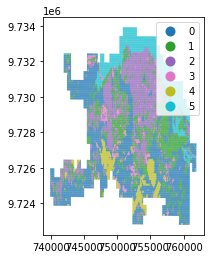

In [61]:
figure = plt.figure(figsize=(20,10))
geom.plot(column= geom['KM_6'], legend=True, categorical=True)

Gerando um gráfico de <i>dendrograma</i> para identificar um bom número de cluster no modelo <b>AC</b>:

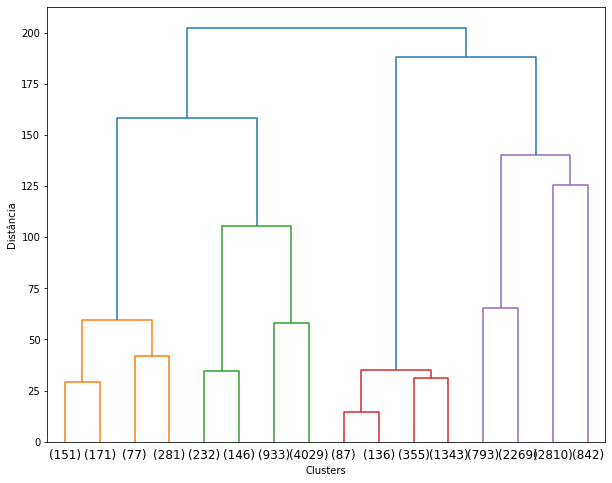

In [62]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))

dendrograma = dendrogram(linkage(dados, method='ward'), ax=axes, p = 3, truncate_mode = 'level')
plt.xlabel('Clusters')
plt.ylabel('Distância');
plt.show()

Construindo o modelo <b>AC</b>:

In [63]:
ag_model = AgglomerativeClustering(n_clusters = 6, linkage='ward', affinity='euclidean')
ag_model.fit(dados)

AgglomerativeClustering(n_clusters=6)

Visualizando a quantidade de feições em cada cluster:

In [64]:
unique, counts = np.unique(ag_model.labels_, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[   0 5340]
 [   1  842]
 [   2 2810]
 [   3  680]
 [   4 3062]
 [   5 1921]]


Incluindo o resultado do modelo <b>AC</b> na base de dados:

In [65]:
geom['HC_6'] = ag_model.labels_

Visualizando um mapa simples com os clusters do modelo <b>AC</b>:

<AxesSubplot:>

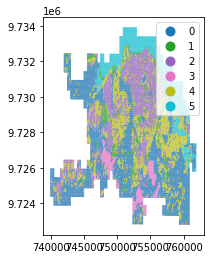

In [66]:
geom.plot(column= geom['HC_6'], legend=True, categorical=True)

Construindo o modelo <b>SOM</b>:

In [67]:
som_model = SOM(m=2, n=3, dim=8, sigma = 0.001)
som_model.fit(dados, epochs = 10000)
predicao_som = som_model.predict(dados)

Visualizando a quantidade de feições em cada cluster:

In [68]:
unique, counts = np.unique(predicao_som, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[   0 1835]
 [   1 6384]
 [   2 4593]
 [   3  755]
 [   4  546]
 [   5  542]]


Incluindo o resultado do modelo <b>SOM</b> na base de dados:

In [70]:
geom['SOM_23_6'] = predicao_som

Visualizando um mapa simples com os clusters do modelo <b>SOM</b>:

<AxesSubplot:>

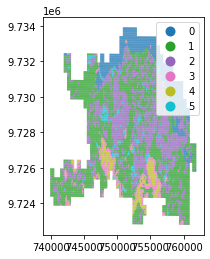

In [73]:
geom.plot(column= geom['SOM_23_6'], legend=True, categorical=True)

Visualizando a base de dados e exportando uma chamada shapefile com as informações:

In [74]:
geom

,ID,geometry,SN [MEAN],VN [MEAN],HND [MEAN],CA_AG,CA_SE,CA_VA,CA_VH,PD_VH,KM_7,KM_6,HC_6,SOM_24_8,SOM_23_6
0,0,"POLYGON ((752288.17666 9722818.28253, 752288.6...",-0.073030,0.787566,0.205118,-0.403693,-0.309557,0.928459,-0.682653,-0.835323,3,0,0,1,1
1,1,"POLYGON ((752388.36020 9722817.84804, 752388.7...",0.339348,0.632469,-0.077947,-0.403693,-0.309557,0.918417,-0.682653,-0.835323,3,0,0,1,1
2,2,"POLYGON ((752488.54379 9722817.41380, 752488.9...",0.709323,-0.254420,-0.475393,-0.403693,-0.309557,0.908381,-0.682653,-0.835323,3,0,0,1,1
3,3,"POLYGON ((752588.72746 9722816.97981, 752589.1...",0.133846,-0.601097,-0.595551,-0.403693,-0.309557,0.898350,-0.682653,-0.835323,3,0,0,1,1
4,4,"POLYGON ((752688.91118 9722816.54607, 752689.3...",-0.148261,-1.313754,-0.614037,-0.403693,0.368860,0.294439,-0.520657,-0.114445,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,14650,"POLYGON ((752435.78613 9733807.56075, 752436.2...",-0.723446,0.178388,-0.720330,2.703014,-0.309557,-0.966817,-0.682653,-0.835323,4,5,5,0,0
14651,14651,"POLYGON ((752535.94173 9733807.13343, 752536.3...",-0.876452,-0.123452,-0.817381,2.703018,-0.309557,-0.966817,-0.682653,-0.835323,4,5,5,0,0
14652,14652,"POLYGON ((752636.09739 9733806.70637, 752636.5...",-0.972583,-0.069461,-0.817381,2.703022,-0.309557,-0.966817,-0.682653,-0.835323,4,5,5,0,0
14653,14653,"POLYGON ((752736.25311 9733806.27957, 752736.6...",-0.854758,-0.001129,-0.754991,2.703025,-0.309557,-0.966817,-0.682653,-0.835323,4,5,5,0,0


In [76]:
geom.to_file("E:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\AMBIENTAL\\clusters_ambiental.shp")